<a href="https://colab.research.google.com/github/Brandon12231/780/blob/main/Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Preprocessing Stage

In [ ]:
import os
import random
import shutil
import google.auth
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from google.colab import drive
!pip install PyPDF2
import tempfile
!pip install pdf2image
!apt-get install poppler-utils
import PyPDF2
from pdf2image import convert_from_path
import tempfile
from tensorflow.keras.utils import image_dataset_from_directory

os.environ['PATH'] += ':/usr/local/bin'
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 6.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 174 kB of archives.
After this operation, 754 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 poppler-utils amd64 0.86.1-0ubuntu1.1 [174 kB]
Fetched 174 kB in 1s (137 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 122400 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.86.1-0ubuntu1.1_amd64.deb ...
Unpacking poppler-utils (0.86.1-0ubuntu1.1) ...
Setting up

In [ ]:
project_folder_path = '/content/drive/Shareddrives/Neural_Network_Project'

categories = []

for item in os.listdir(project_folder_path):
    item_path = os.path.join(project_folder_path, item)
    
    # Check if the item is a folder
    if os.path.isdir(item_path):
        categories.append(item)

print(categories)

['variations_pieces', 'prelude_pieces', 'concerto_pieces', 'sonata_pieces', 'rhapsody_pieces', 'final_converted_folder']


In [ ]:
project_folder_path = '/content/drive/Shareddrives/Neural_Network_Project'
img_output_folder_path = '/content/drive/Shareddrives/Neural_Network_Project/final_converted_folder'

PLEASE DO NOT RUN FOLLOWING CODE

In [ ]:
# if the folder to store the png does not exist, create folder called pdf_to_png under it
project_folder_path = '/content/drive/Shareddrives/Neural_Network_Project'

# Define the name of the folder to store the PNG images
images_folder = "final_converted_folder"

# Create the output folder if it does not exist
output_dir = os.path.join(project_folder_path, images_folder)
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

# Iterate over each category folder in the project folder
for category in categories:
    
    # Concatenate the categorical folder path
    category_folder_path = os.path.join(project_folder_path, category)

    # Define the output folder for the categorical folder
    category_output_path = os.path.join(output_dir, category)

    # Create the output folder for the categorical folder
    if not os.path.exists(category_output_path):
        os.makedirs(category_output_path)

    # Iterate over each PDF file in the categorical folder
    for filename in os.listdir(category_folder_path):

        # Check if the file is a PDF file
        if filename.endswith(".pdf"):

            # Open the PDF file
            pdf_file = open(os.path.join(category_folder_path, filename), "rb")
            pdf_reader = PyPDF2.PdfReader(pdf_file)

            # Iterate over each page in the PDF file
            for page_num in range(len(pdf_reader.pages)):
                # Convert the page to a PNG image
                with tempfile.TemporaryDirectory() as temp:
                    images = convert_from_path(
                        pdf_file.name,
                        dpi=200,
                        first_page=None,
                        last_page=None,
                        output_folder=temp,
                    )

                    # Save the PNG image to a file
                    image = images[page_num]
                    output_file_path = os.path.join(
                        category_output_path,
                        os.path.splitext(filename)[0] + f"_page{page_num+1}.png",
                    )
                    image.save(output_file_path, format="PNG")
                    print(f"Converted {filename} page {page_num+1} to {output_file_path}")

Following results shows how many image files in the folder after converting the pdf to the png version.

In [ ]:
img_output_folder_path = '/content/drive/Shareddrives/Neural_Network_Project/final_converted_folder'

for category in os.listdir(img_output_folder_path):
    category_output_path = os.path.join(img_output_folder_path, category)
    
    if os.path.isdir(category_output_path):
        # List all files in the directory
        files = os.listdir(category_output_path)

        # Count the number of files
        num_files = len([f for f in files if os.path.isfile(os.path.join(category_output_path, f))])

        # Print the count of files for each category
        print(f"Category: {category}, Number of Files: {num_files}")

Category: variations_pieces, Number of Files: 244
Category: prelude_pieces, Number of Files: 237
Category: concerto_pieces, Number of Files: 1455
Category: sonata_pieces, Number of Files: 693
Category: rhapsody_pieces, Number of Files: 529


After converting the pdf file into the png format, we want to shuffling the image orders and divide them in 3 categories - training folder, test folder, and validation folder - to train and test the CNN model.Here we set the ratio of 70-20-10, so the file amount will be following (cause the actual results got the decimal points, use the subtraction for th validation set here):



  **1. variations pieces**
        
        - train: 244 * 0.7 = 170
        - test:  244 * 0.2 = 48
        - validation: 244 - 170 - 48 = 26 

  **2. prelude pieces**
        
        - train: 237 * 0.7 = 165
        - test: 237 * 0.2 = 47
        - validation: 237 - 165 - 47 = 25 

  **3. concerto_pieces**
        
        - train: 1455 * 0.7 = 1018
        - test: 1455 * 0.2 = 291
        - validation: 1455 - 1018 - 291 = 146

  **4. sonata_pieces**
        
        - train: 693 * 0.7 = 485
        - test: 693 * 0.2 = 138
        - validation: 693 - 485 - 138 = 70
  
  **5. rhapsody_pieces**
        
        - train: 529 * 0.7 = 370
        - test: 529 * 0.2 = 105
        - validation: 529 - 370 - 105 = 54

In [ ]:
# Set the ratio for train, test, and validation sets
train_ratio = 0.7
test_ratio = 0.2
val_ratio = 0.1

# Iterate through the directories inside the parent directory
for category in os.listdir(img_output_folder_path):
    category_folder_path = os.path.join(img_output_folder_path, category)

    # Check if the path is a directory
    if os.path.isdir(category_folder_path):

        # List all files in the category folder
        files = [f for f in os.listdir(category_folder_path) if os.path.isfile(os.path.join(category_folder_path, f))]

        # Shuffle the files
        random.seed(812)
        random.shuffle(files)

        # Calculate the number of files for train, test, and validation sets
        train_size = int(train_ratio * len(files))
        test_size = int(test_ratio * len(files))
        val_size = int(val_ratio * len(files))

        # Split the files into train, test, and validation sets
        train_files = files[:train_size]
        test_files = files[train_size : train_size + test_size]
        val_files = files[train_size + test_size :]

        # Create train, test, and validation folders under the category folder
        for split_folder, split_files in [("train", train_files), ("test", test_files), ("validation", val_files)]:
            split_folder_path = os.path.join(category_folder_path, split_folder)
            if not os.path.exists(split_folder_path):
                os.makedirs(split_folder_path)

            # Move the files to the appropriate split folder
            for file in split_files:
                src_file_path = os.path.join(category_folder_path, file)
                dst_file_path = os.path.join(split_folder_path, file)
                shutil.move(src_file_path, dst_file_path)

Exam the output file meet the expections:

In [ ]:
for category in os.listdir(img_output_folder_path):
    category_output_path = os.path.join(img_output_folder_path, category)

    for sub_folder in os.listdir(category_output_path):
        sub_folder_path = os.path.join(category_output_path, sub_folder)

        if os.path.isdir(sub_folder_path):
            # List all files in the directory
            files = os.listdir(sub_folder_path)  # Corrected line

            # Count the number of files
            num_files = len([f for f in files if os.path.isfile(os.path.join(sub_folder_path, f))])

            # Print the count of files for each category
            print(f"Category: {category}, Sub-folder type: {sub_folder}, Number of Files: {num_files}")

Category: variations_pieces, Sub-folder type: train, Number of Files: 170
Category: variations_pieces, Sub-folder type: test, Number of Files: 48
Category: variations_pieces, Sub-folder type: validation, Number of Files: 26
Category: prelude_pieces, Sub-folder type: train, Number of Files: 165
Category: prelude_pieces, Sub-folder type: test, Number of Files: 47
Category: prelude_pieces, Sub-folder type: validation, Number of Files: 25
Category: concerto_pieces, Sub-folder type: train, Number of Files: 1018
Category: concerto_pieces, Sub-folder type: test, Number of Files: 291
Category: concerto_pieces, Sub-folder type: validation, Number of Files: 146
Category: sonata_pieces, Sub-folder type: train, Number of Files: 485
Category: sonata_pieces, Sub-folder type: test, Number of Files: 138
Category: sonata_pieces, Sub-folder type: validation, Number of Files: 70
Category: rhapsody_pieces, Sub-folder type: train, Number of Files: 370
Category: rhapsody_pieces, Sub-folder type: test, Numbe

# 2. Data Exploration Analysis

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory



# 3. Model Pipline

In [ ]:
import os
import cv2
import numpy as np
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
base_dir = '/content/drive/Shareddrives/Neural_Network_Project/final_converted_folder'

# Define the class names
class_names = ['variations_pieces', 'sonata_pieces', 'rhapsody_pieces', 'prelude_pieces', 'concerto_pieces']

# Define the image size
img_size = (512,512)

In [ ]:
# Load the training data
# X_train is to store the image (matrix) to the list
X_train = []
y_train = []

for i, class_name in enumerate(class_names):
    train_dir = os.path.join(base_dir, class_name, 'train')
    for filename in os.listdir(train_dir):
        img_path = os.path.join(train_dir, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, img_size)
        X_train.append(img)
        y_train.append(i)

# Convert the training data to numpy arrays
X_train = np.array(X_train)
y_train = to_categorical(np.array(y_train))

# Create the batch size 32 for each set, reshape the image dimension to fit the CNN model
batch_size = 32
X_train = np.expand_dims(X_train, axis=-1)
train_data = ImageDataGenerator().flow(X_train, y_train, batch_size=batch_size, shuffle=True)

In [ ]:
batch = next(train_data)
print(batch[0].shape)
print(batch[1].shape)

(32, 512, 512, 1)
(32, 5)


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train,axis=0))

(2208, 512, 512, 1)
(2208, 5)
[[0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [ ]:
X_validation = []
y_validation = []

for i, class_name in enumerate(class_names):
    val_dir = os.path.join(base_dir, class_name, 'validation')
    for filename in os.listdir(val_dir):
        img_path = os.path.join(val_dir, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, img_size)
        X_validation.append(img)
        y_validation.append(i)

# Convert the training data to numpy arrays
X_validation = np.array(X_validation)
y_validation = to_categorical(np.array(y_validation))

# Create the batch size 32 for each set, reshape the image dimension to fit the CNN model
batch_size = 32
X_validation = np.expand_dims(X_validation, axis=-1)
validation_data = ImageDataGenerator().flow(X_validation, y_validation, batch_size=batch_size, shuffle=True)

In [ ]:
print(X_validation.shape)
print(y_validation.shape)
print(np.unique(y_validation, axis=0))

(321, 512, 512, 1)
(321, 5)
[[0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [ ]:
X_test = []
y_test = []

for i, class_name in enumerate(class_names):
    test_dir = os.path.join(base_dir, class_name, 'test')
    for filename in os.listdir(test_dir):
        img_path = os.path.join(test_dir, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, img_size)
        X_test.append(img)
        y_test.append(i)

# Convert the test data to numpy arrays
X_test = np.array(X_test)
y_test = to_categorical(np.array(y_test))

# Create the batch size 32 for each set, reshape the image dimension to fit the CNN model
batch_size = 32
X_test = np.expand_dims(X_test, axis=-1)
test_data = ImageDataGenerator().flow(X_test, y_test, batch_size=batch_size, shuffle=True)

In [ ]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test,axis=0))

(629, 512, 512, 1)
(629, 5)
[[0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


2. From the above printed one-hot-encoding results, values are same across the training, testing, and validation set. So we now can create a dictionary. Exam the use after the model prediction

In [ ]:
one_hot_encoding_dict = {}

for i in range(len(class_names)):
    one_hot_encoding_dict[np.argmax(to_categorical(i, num_classes=len(class_names)))] = class_names[i]

In [ ]:
l1 = [0., 0., 0., 0., 1.]

In [ ]:
training_label = np.unique([one_hot_encoding_dict[np.argmax(label)] for label in y_train])
print(training_label)

validation_label = np.unique([one_hot_encoding_dict[np.argmax(label)] for label in y_validation])
print(validation_label)

test_label = np.unique([one_hot_encoding_dict[np.argmax(label)] for label in y_test])
print(test_label)

['concerto_pieces' 'prelude_pieces' 'rhapsody_pieces' 'sonata_pieces'
 'variations_pieces']
['concerto_pieces' 'prelude_pieces' 'rhapsody_pieces' 'sonata_pieces'
 'variations_pieces']
['concerto_pieces' 'prelude_pieces' 'rhapsody_pieces' 'sonata_pieces'
 'variations_pieces']


Exam the training, testing set, and validation sets

Following 5 images are from the training set:


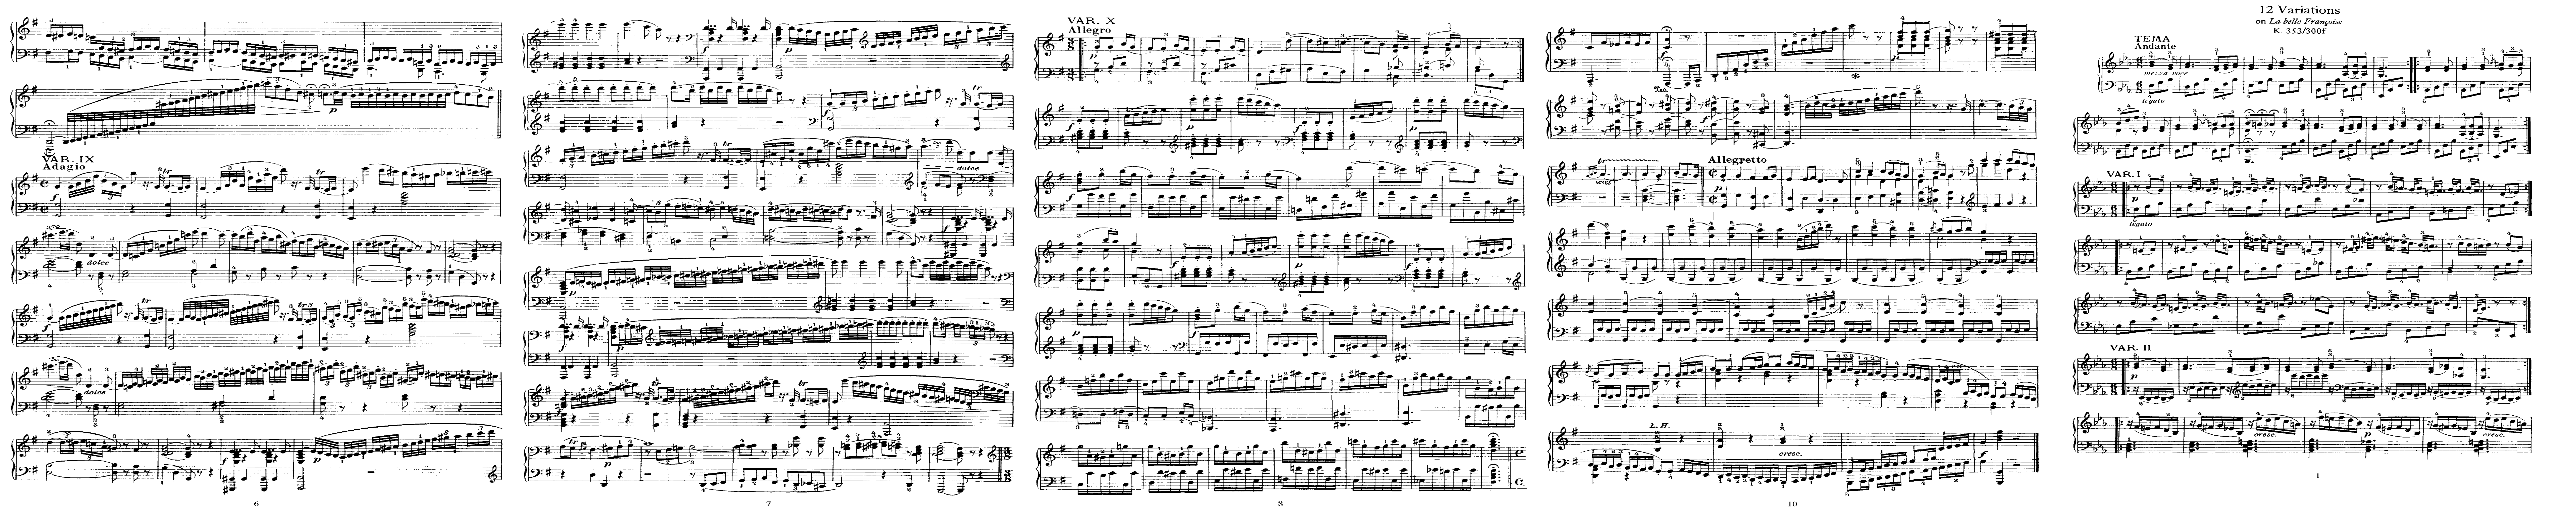

Following 5 images are from the validation set:


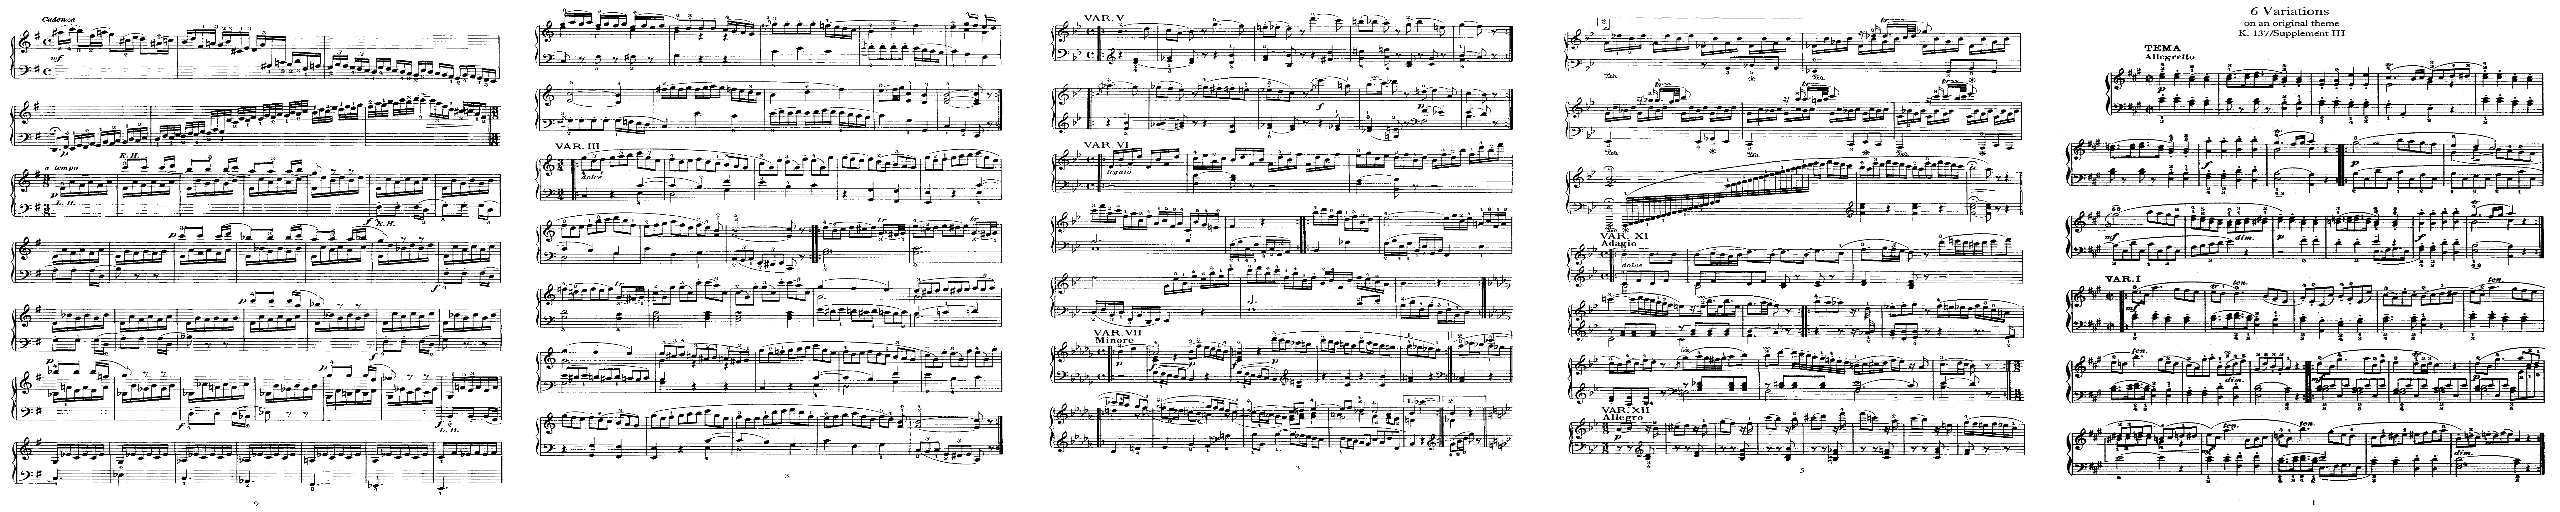

Following 5 images are from the test set:


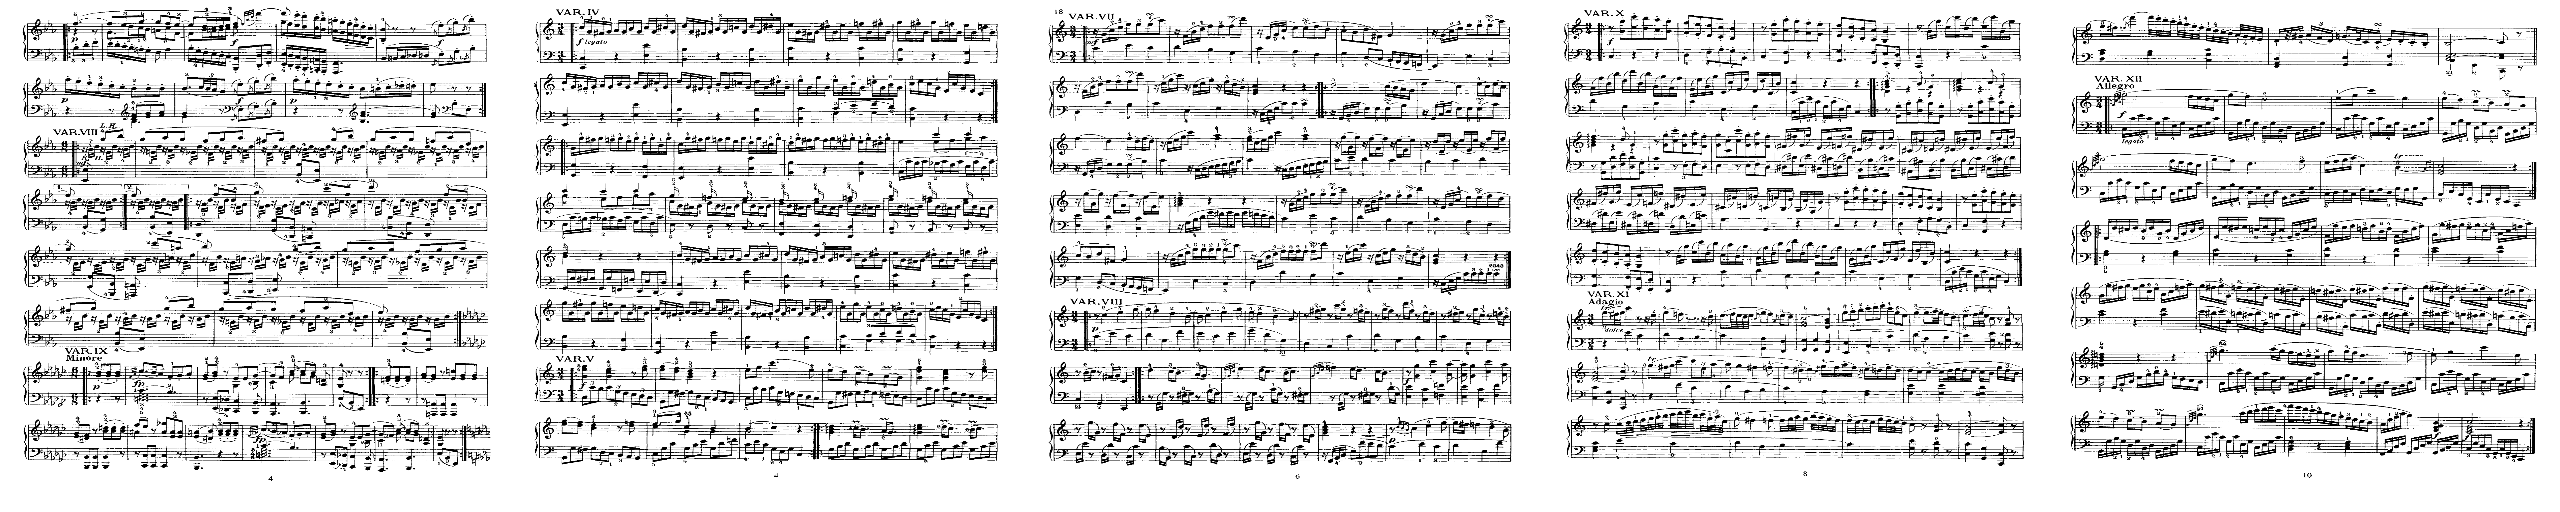

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np

print("Following 5 images are from the training set:")
# Create a list of the first five images
images_train = [X_train[i] for i in range(5)]

# stack the images and let image display in a horizontal axis
stacked_train_images = np.hstack(images_train)

# Display the stacked images and their label
cv2_imshow(stacked_train_images)

print("=============================================================================================================================================================================")

print("Following 5 images are from the validation set:")
# Create a list of the first five images and display them in a horizotal axis
images_validation = [X_validation[o] for o in range(5)]
stacked_valid_images = np.hstack(images_validation)

# Display the stacked images
cv2_imshow(stacked_valid_images)

print("=============================================================================================================================================================================")

print("Following 5 images are from the test set:")
# Create a list of the first five images and display them in a horizotal axis
images_test = [X_test[j] for j in range(5)]
stacked_test_images = np.hstack(images_test)

# Display the stacked images
cv2_imshow(stacked_test_images)

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, add, GlobalAveragePooling2D, Dense

# Define the model architecture
inputs = keras.Input(shape=(512, 512, 1))
x = Conv2D(32, 3, strides=2, padding="same", use_bias=False)(inputs)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Conv2D(64, 3, padding="same", use_bias=False)(x)

residual = Conv2D(128, 1, strides=2, padding="same", use_bias=False)(x)

for size in [128, 256, 512]:
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(size, 3, padding="same", use_bias=False)(x)

    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(size, 3, padding="same", use_bias=False)(x)

    x = MaxPooling2D(3, strides=2, padding="same")(x)

    residual = Conv2D(size, 1, strides=2, padding="same", use_bias=False)(residual)
    x = add([x, residual])
    residual = x

x = BatchNormalization()(x)
x = Activation("relu")(x)
x = GlobalAveragePooling2D()(x)

outputs = Dense(5, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, epochs=5, validation_data=validation_data, batch_size=30)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_data, verbose=2)
print("Test accuracy:", test_acc)


ValueError: ignored